In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## import data

In [11]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset
# split into tetsing and training
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)

# grayscale images
print(train_images[0,23,23])

# labels are numbers between 0 - 9
print(train_labels[:10])
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

(60000, 28, 28)
194
[9 0 0 3 0 2 7 2 5 5]


## check data

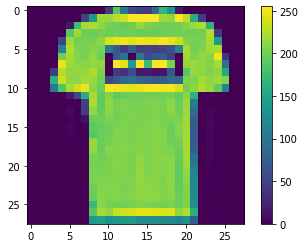

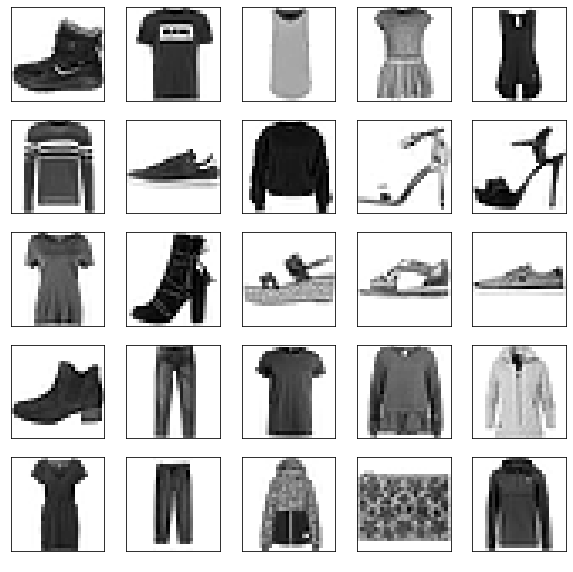

In [12]:
# image example
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

# classification check
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])  # does not work as intended
plt.show()

## data preprocessing

In [3]:
# scale input between 0 - 1
train_images = train_images / 255.0
test_images = test_images / 255.0

## building & the model

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1), Flatten: flattens the 28 x 28 matrix
    keras.layers.Dense(128, activation="relu"),  # hidden layer (2)
    keras.layers.Dense(10, tf.keras.layers.Softmax()) # output layer (3) & activation="softmax" also possible
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## train

In [26]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4763 - accuracy: 0.6810
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6828 - accuracy: 0.7365
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5902 - accuracy: 0.7909
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5508 - accuracy: 0.8087
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5382 - accuracy: 0.8145
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5136 - accuracy: 0.8253
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5058 - accuracy: 0.8285
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4975 - accuracy: 0.8317
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4822 - accuracy: 0.8359
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.482

## test

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 
print("Test accuracy:", test_acc)

313/313 [==============================] - 0s 961us/step - loss: 0.5230 - accuracy: 0.8263
Test accuracy: 0.8263000249862671


## predict

[8.0623334e-07 7.6438733e-10 2.1681170e-09 1.2655188e-11 2.3558265e-07
 8.9528930e-04 3.1596755e-08 6.6369763e-03 1.2907855e-09 9.9246663e-01]
prediction: 9 and corret label: 9


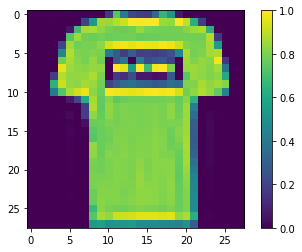

In [7]:
predictions = model.predict(test_images)
print(predictions[0])
print(f"prediction: {str(np.argmax(predictions[0]))} and corret label: {test_labels[0]}")
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

## verifying predictions

Pick a number: 12
expected: Sneaker
prediction: Bag


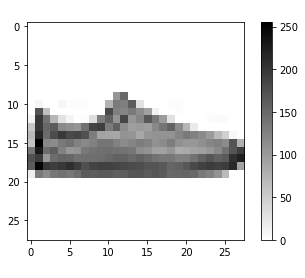

In [34]:
COLOR = "white"
plt.rcParams["text.color"] = COLOR
plt.rcParams["axes.labelcolor"] = COLOR

def predict(model, image, correct_label):
  class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)  # is not showing axis unfortunately
  plt.xlabel("Guess: " + guess)
  print(f"expected: {label}")
  print(f"prediction: {guess}")
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

## extra graphs

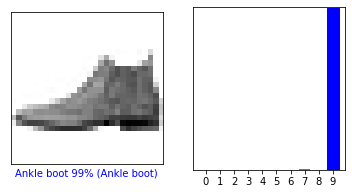

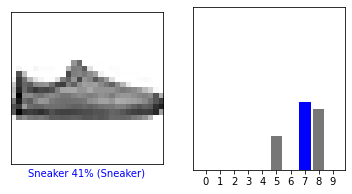

In [35]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

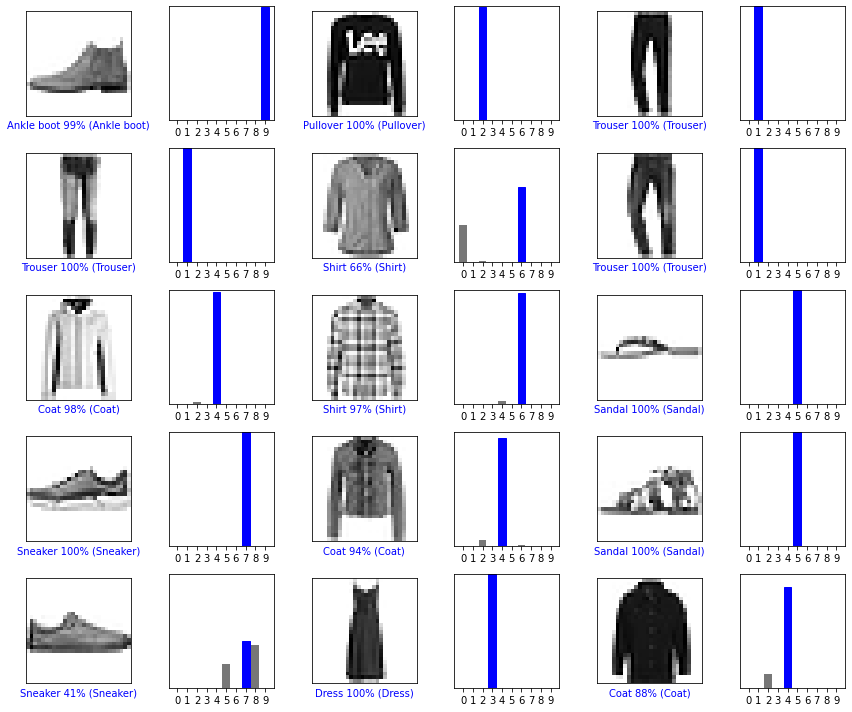

In [31]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()